In [34]:
import pprint
import pandas as pd

# Importação da base de dados:
base = pd.read_csv('census.csv')
pprint.pprint(base)
pprint.pprint(base.describe())

       age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-marrie

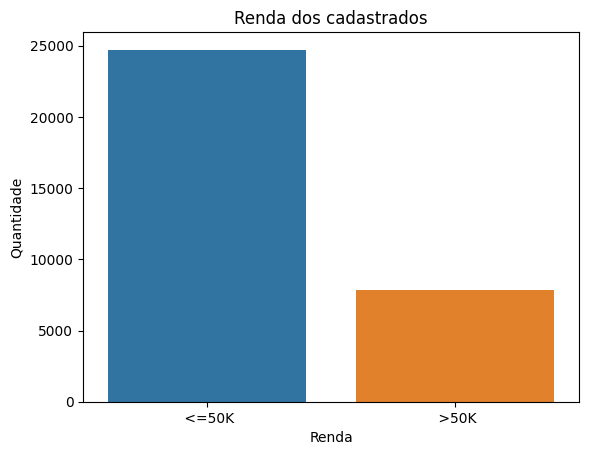

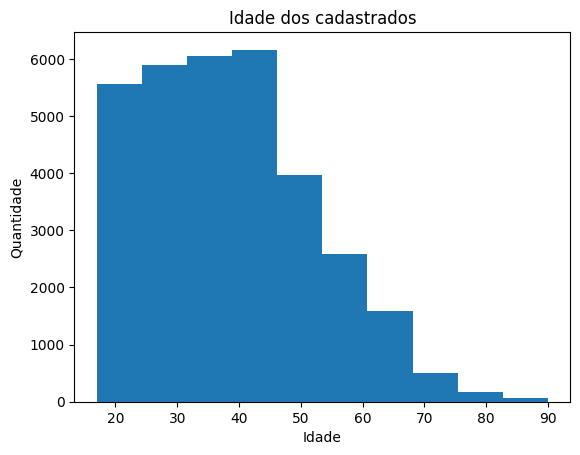

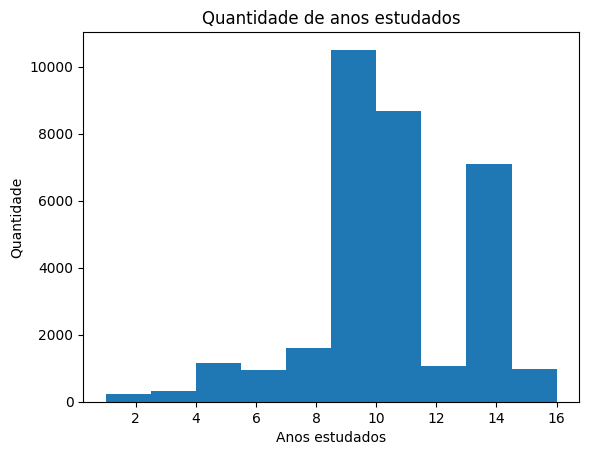

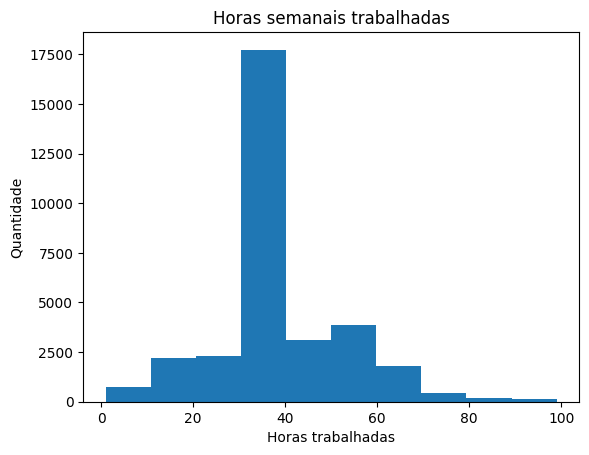

"grafico = px.treemap(base, path=['workclass'])\ngrafico.show()\n\ngrafico1 = px.treemap(base, path=['workclass', 'age'])\ngrafico1.show()\n\ngrafico2 = px.parallel_categories(base, dimensions=['age', 'income'])\ngrafico2.show()"

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

# Visualização dos dados:
np.unique(base['income'], return_counts=True)

sns.countplot(x=base['income'], data=base)
plt.xlabel('Renda')
plt.ylabel('Quantidade')
plt.title('Renda dos cadastrados')
plt.show()

plt.hist(base['age'])
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Idade dos cadastrados')
plt.show()

plt.hist(base['education-num'])
plt.xlabel('Anos estudados')
plt.ylabel('Quantidade')
plt.title('Quantidade de anos estudados')
plt.show()

plt.hist(base['hour-per-week'])
plt.xlabel('Horas trabalhadas')
plt.ylabel('Quantidade')
plt.title('Horas semanais trabalhadas')
plt.show()

'''grafico = px.treemap(base, path=['workclass'])
grafico.show()

grafico1 = px.treemap(base, path=['workclass', 'age'])
grafico1.show()

grafico2 = px.parallel_categories(base, dimensions=['age', 'income'])
grafico2.show()'''

In [28]:
# Visão de todas as colunas:
print(base.columns, end='\n\n')

# Divisão entre previsores e classe:
#   Previsores:
X_base = base.iloc[:, 0:14].values
print(X_base, end='\n\n')
print(X_base[0], end='\n\n')

#   Classe:
Y_base = base.iloc[:, 14].values
print(Y_base, end='\n\n')

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

[[39 ' State-gov' 77516 ... 0 40 ' United-States']
 [50 ' Self-emp-not-inc' 83311 ... 0 13 ' United-States']
 [38 ' Private' 215646 ... 0 40 ' United-States']
 ...
 [58 ' Private' 151910 ... 0 40 ' United-States']
 [22 ' Private' 201490 ... 0 20 ' United-States']
 [52 ' Self-emp-inc' 287927 ... 0 40 ' United-States']]

[39 ' State-gov' 77516 ' Bachelors' 13 ' Never-married' ' Adm-clerical'
 ' Not-in-family' ' White' ' Male' 2174 0 40 ' United-States']

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' >50K']



In [29]:
# OBS: Como há valores categóricos (string) devemos fazer o tratamento deste valores,
# de modo a transformá-los em números usando o LabelEncoder ou OneHotEncoder

from sklearn.preprocessing import LabelEncoder

#   LabelEncoder:

label_encoder_workclass = LabelEncoder()
X_base[:, 1] = label_encoder_workclass.fit_transform(X_base[:, 1])

label_encoder_education = LabelEncoder()
X_base[:, 3] = label_encoder_education.fit_transform(X_base[:, 3])

label_encoder_marital_status = LabelEncoder()
X_base[:, 5] = label_encoder_marital_status.fit_transform(X_base[:, 5])

label_encoder_occupation = LabelEncoder()
X_base[:, 6] = label_encoder_occupation.fit_transform(X_base[:, 6])

label_encoder_relationship = LabelEncoder()
X_base[:, 7] = label_encoder_relationship.fit_transform(X_base[:, 7])

label_encoder_race = LabelEncoder()
X_base[:, 8] = label_encoder_race.fit_transform(X_base[:, 8])

label_encoder_sex = LabelEncoder()
X_base[:, 9] = label_encoder_sex.fit_transform(X_base[:, 9])

label_encoder_native_country = LabelEncoder()
X_base[:, 13] = label_encoder_native_country.fit_transform(X_base[:, 13])

print(X_base[0], end='\n\n')

[39 7 77516 9 13 4 1 1 4 1 2174 0 40 39]



In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotenconder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')
X_base = onehotenconder_census.fit_transform(X_base).toarray()

In [31]:
# Escalonamento de valores 

from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_base = scaler_census.fit_transform(X_base)
print(X_base)

# Todos os valores foram deixados na mesma escala.

[[-0.2444502  -0.17429511 -0.26209736 ...  0.1484529  -0.21665953
  -0.03542945]
 [-0.2444502  -0.17429511 -0.26209736 ... -0.14592048 -0.21665953
  -2.22215312]
 [-0.2444502  -0.17429511 -0.26209736 ... -0.14592048 -0.21665953
  -0.03542945]
 ...
 [-0.2444502  -0.17429511 -0.26209736 ... -0.14592048 -0.21665953
  -0.03542945]
 [-0.2444502  -0.17429511 -0.26209736 ... -0.14592048 -0.21665953
  -1.65522476]
 [-0.2444502  -0.17429511 -0.26209736 ...  1.88842434 -0.21665953
  -0.03542945]]


In [35]:
# Divisão das bases de treinamento e teste

from sklearn.model_selection import train_test_split

X_base_treinamento, X_base_teste, Y_base_treinamento, Y_base_teste = train_test_split(X_base, Y_base, test_size = 0.15, random_state=0)


In [40]:
X_base_treinamento.shape, Y_base_treinamento.shape

((27676, 108), (27676,))

In [41]:
X_base_teste.shape, Y_base_teste.shape

((4885, 108), (4885,))

In [42]:
# Armazenamento da base já pré-processada:

import pickle

with open('census.pkl', mode='wb') as f:
    pickle.dump([X_base_treinamento, Y_base_treinamento, X_base_teste, Y_base_teste], f)
